In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import time

print('Modules loaded :)')

Modules loaded :)


In [2]:

def frand(low, high):
    return low + np.random.rand() * (high - low)

def mkplummer(n, seed=0):
    if seed == 0:
        np.random.seed()
    else:
        np.random.seed(seed)

    bodies = np.zeros((n, 7)) # Each row: mass, x, y, z, vx, vy, vz

    for i in range(n):
        bodies[i, 0] = 1.0 / n
        radius = 1.0 / np.sqrt(np.random.rand() ** (-2.0 / 3.0) - 1.0)
        theta = np.arccos(frand(-1, 1))
        phi = frand(0, 2 * np.pi)
        bodies[i, 1] = radius * np.sin(theta) * np.cos(phi)
        bodies[i, 2] = radius * np.sin(theta) * np.sin(phi)
        bodies[i, 3] = radius * np.cos(theta)

        x = 0.0
        y = 0.1
        while y > x * x * (1.0 - x * x)**3.5:
            x = frand(0, 1)
            y = frand(0, 0.1)

        velocity = x * np.sqrt(2.0) * (1.0 + radius * radius) ** (-0.25)
        theta = np.arccos(frand(-1, 1))
        phi = frand(0, 2 * np.pi)
        bodies[i, 4] = velocity * np.sin(theta) * np.cos(phi)
        bodies[i, 5] = velocity * np.sin(theta) * np.sin(phi)
        bodies[i, 6] = velocity * np.cos(theta)

    return bodies


In [4]:
## vectorised version of the function above

def mkplummer_vectorised(n, seed=0):
    if seed == 0:
        np.random.seed()
    else:
        np.random.seed(seed)

    bodies = np.zeros((n, 7))  # Each row: mass, x, y, z, vx, vy, vz
    bodies[:, 0] = 1.0 / n

    # Generate positions
    radius = 1.0 / np.sqrt(np.random.rand(n) ** (-2.0 / 3.0) - 1.0)
    theta = np.arccos(np.random.uniform(-1, 1, n))
    phi = np.random.uniform(0, 2 * np.pi, n)
    bodies[:, 1] = radius * np.sin(theta) * np.cos(phi)
    bodies[:, 2] = radius * np.sin(theta) * np.sin(phi)
    bodies[:, 3] = radius * np.cos(theta)

    # Generate velocities
    x = np.random.rand(n)
    y = np.random.rand(n) * 0.1
    mask = y > x * x * (1.0 - x * x)**3.5
    while np.any(mask):
        x[mask] = np.random.rand(np.sum(mask))
        y[mask] = np.random.rand(np.sum(mask)) * 0.1
        mask = y > x * x * (1.0 - x * x)**3.5

    velocity = x * np.sqrt(2.0) * (1.0 + radius * radius) ** (-0.25)
    theta = np.arccos(np.random.uniform(-1, 1, n))
    phi = np.random.uniform(0, 2 * np.pi, n)
    bodies[:, 4] = velocity * np.sin(theta) * np.cos(phi)
    bodies[:, 5] = velocity * np.sin(theta) * np.sin(phi)
    bodies[:, 6] = velocity * np.cos(theta)

    return bodies

In [5]:
# generate a random cluster of n bodies

# Start timing
start_time = time.perf_counter()

N = 102000000

#bodies = mkplummer(N,seed=42)
bodies = mkplummer_vectorised(N,seed=42)

# End timing
end_time = time.perf_counter()

# Calculate the duration
duration = end_time - start_time
print(f"The code took {duration} seconds to run.")

The code took 76.26456791907549 seconds to run.


In [6]:
# saving the data, ignorig the mass column
np.save("plummer_dumbish.npy",bodies[:,1:])

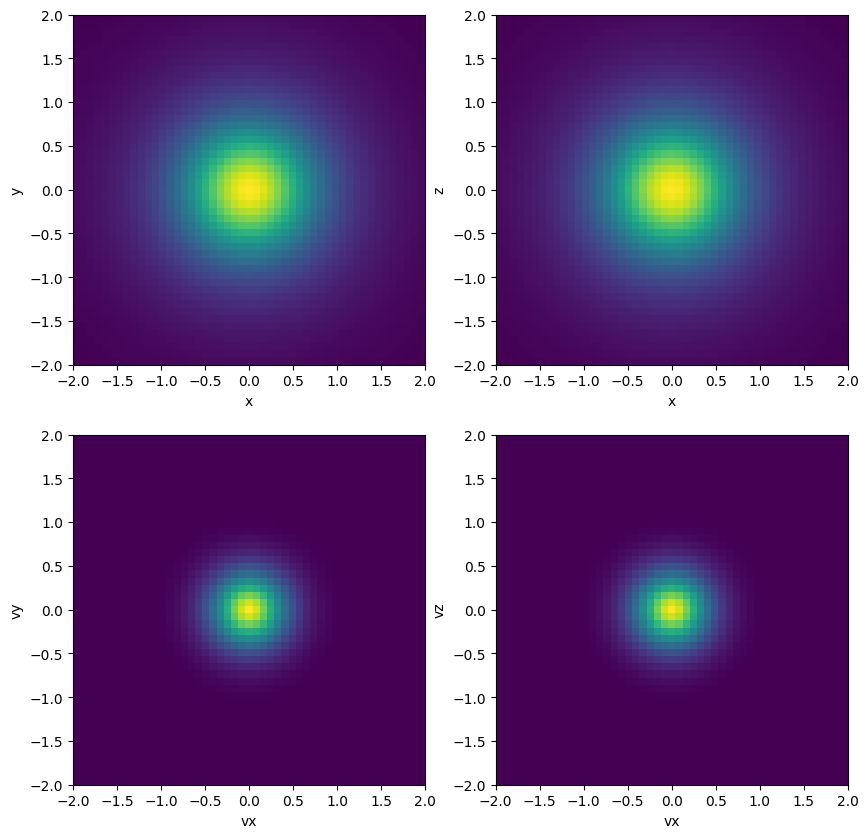

<Figure size 640x480 with 0 Axes>

In [7]:
# plot the x-y, x-z, and y-z projections of the cluster in positions and velocities
xlim = 2
ylim = 2
nbins = 50
x_edges = np.linspace(-xlim, xlim, nbins)
y_edges = np.linspace(-ylim, ylim, nbins)
bins = [x_edges, y_edges]

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(221)
_ = ax.hist2d(bodies[:,1], bodies[:,2], bins=bins)
ax.set_xlim(-xlim,xlim)
ax.set_ylim(-ylim,ylim)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax = fig.add_subplot(222)
_ = ax.hist2d(bodies[:,1], bodies[:,3], bins=bins)
ax.set_xlim(-xlim,xlim)
ax.set_ylim(-ylim,ylim)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax = fig.add_subplot(223)
_ = ax.hist2d(bodies[:,4], bodies[:,5], bins=bins)
ax.set_xlim(-xlim,xlim)
ax.set_ylim(-ylim,ylim)
ax.set_xlabel('vx')
ax.set_ylabel('vy')
ax = fig.add_subplot(224)
_ = ax.hist2d(bodies[:,4], bodies[:,6], bins=bins)
ax.set_xlim(-xlim,xlim)
ax.set_ylim(-ylim,ylim)
ax.set_xlabel('vx')
ax.set_ylabel('vz')
plt.show()
plt.tight_layout()

(-2.0, 0.2)

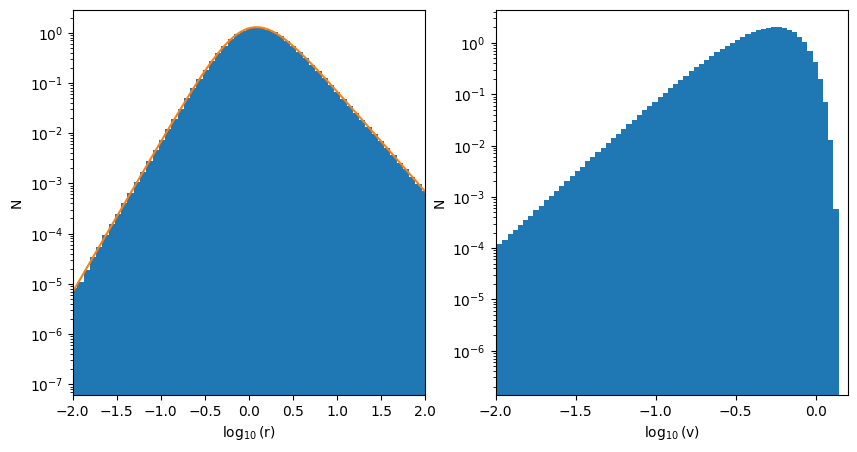

In [8]:
## Plot r and v distribution in log-log space
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
r = np.sqrt(bodies[:,1]**2 + bodies[:,2]**2 + bodies[:,3]**2)
_ = ax.hist(np.log10(r), bins=100, log=True, density=True)
rvals = np.logspace(-2,2,100)
plt.plot(np.log10(rvals), 0.75/np.pi * (1. + rvals**2)**(-2.5) * 4.0*np.pi*rvals**2 * rvals * np.log(10), label=r'$r^{-5}$')
ax.set_xlabel(r'$\log_{10}$(r)')
ax.set_ylabel('N')
ax.set_xlim(-2,2)

ax = fig.add_subplot(122)
v = np.sqrt(bodies[:,4]**2 + bodies[:,5]**2 + bodies[:,6]**2)
_ = ax.hist(np.log10(v), bins=100, log=True, density=True)
ax.set_xlabel(r'$\log_{10}$(v)')
ax.set_ylabel('N')
ax.set_xlim(-2,0.2)

Text(0, 0.5, '$V$')

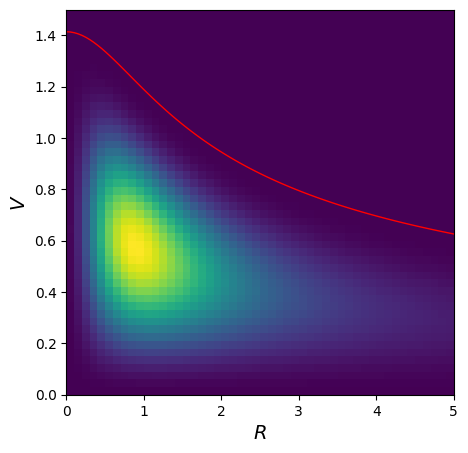

In [12]:
# Plot the distribution of v vs r

plt.figure(figsize=(5,5))
plt.hist2d(
    np.linalg.norm(bodies[:,1:4],axis=1),
    np.linalg.norm(bodies[:,4:],axis=1),
    bins=[50,50],
    range=[[0,5],[0,1.5]],
    cmin=0.,
    #norm=LogNorm()
);
# plot the analytic E=0 curve where E = 0.5 * v^2 - (1+r^2)^(-1/2)
r = np.linspace(0,5,100)
v = np.sqrt(2*(1/np.sqrt(1+r**2))) # E = 0
plt.plot(r,v,'r',linewidth=1)
#plt.gca().set_aspect(1)
plt.gca().set_xlabel(r"$R$", fontsize=14)
plt.gca().set_ylabel(r"$V$", fontsize=14)
